## Косарский Иван, ПМИ-3

## Кластеризация

### Подготовка датасета

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("wholesome_customers_data.csv", sep=",")

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


#### Датасет с данными о продуктах питания

### K-Means

In [4]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

'\n# Plot the ground truth\nax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)\n\nfor name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:\n    ds = dataset[dataset["class"]==name]\n    ax.text3D(\n        ds["petal-lenght"].mean(),\n        ds["sepal-width"].mean(),\n        ds["sepal-lenght"].mean(),\n        name,\n        horizontalalignment="center",\n        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),\n    )\n\nax.scatter(X["petal-lenght"], X["sepal-width"], X["sepal-lenght"], c=y, edgecolor="k")\n\nax.xaxis.set_ticklabels([])\nax.yaxis.set_ticklabels([])\nax.zaxis.set_ticklabels([])\nax.set_xlabel("Petal width")\nax.set_ylabel("Sepal length")\nax.set_zlabel("Petal length")\nax.set_title("Ground Truth")\n\nplt.subplots_adjust(wspace=0.25, hspace=0.25)\nplt.show()'

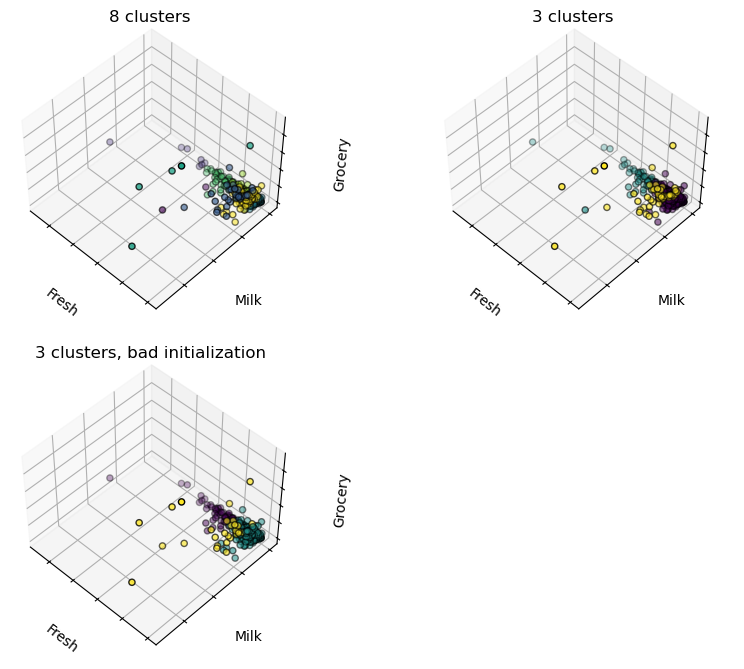

In [7]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(df)
    labels = est.labels_

    ax.scatter(df["Fresh"], df["Milk"], df["Grocery"], c=labels.astype(float), edgecolor="k")
    #ax.scatter(df["Channel"], df["Region"], df["Milk"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Fresh")
    ax.set_ylabel("Milk")
    ax.set_zlabel("Grocery")
    ax.set_title(title)

"""
# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
    ds = dataset[dataset["class"]==name]
    ax.text3D(
        ds["petal-lenght"].mean(),
        ds["sepal-width"].mean(),
        ds["sepal-lenght"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["petal-lenght"], X["sepal-width"], X["sepal-lenght"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()"""

#### Датасет не имеет вектора y. Поэтому построение Ground Truth невозможно

### Метрики:

In [8]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4630267614355114


In [9]:
inertia = est.inertia_
print(f"Inertia: {inertia}")

Inertia: 81540928624.84201


### Иерархическая кластеризация

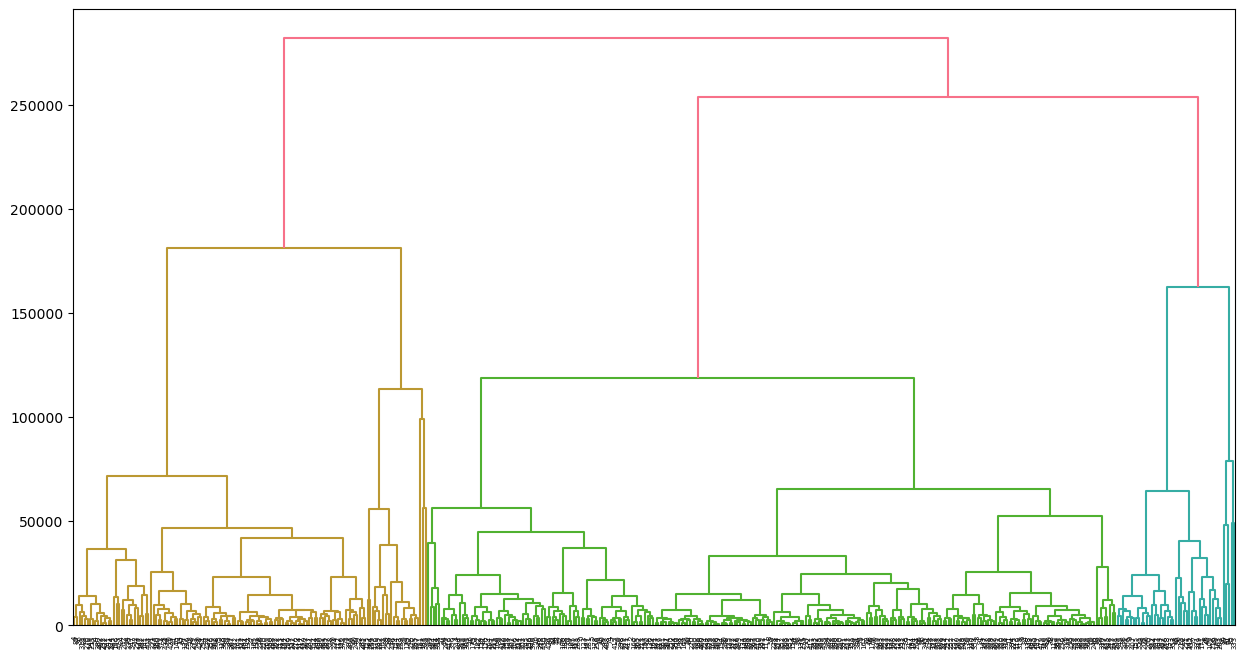

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))

dendrogram(mergings, leaf_rotation=90, leaf_font_size=5)

plt.show()

### DBSCAN

In [11]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

db = DBSCAN(eps=0.5, min_samples=12).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

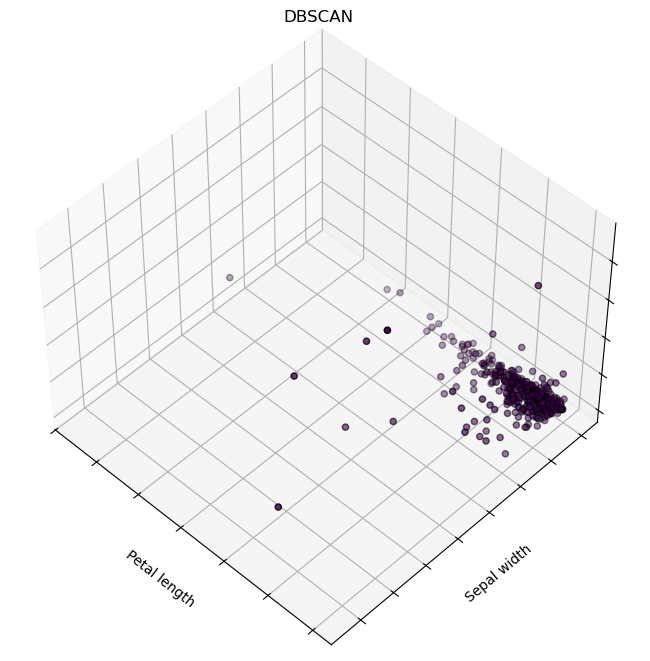

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(df["Fresh"], df["Milk"], df["Grocery"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Sepal length")
ax.set_title("DBSCAN")

plt.show()